# Kickstarter Advisory  
#### Stakeholder question: What is the most important feature (if any) in the success of a Kickstarter project?  

#### Approach of the crowdfunding platform 'kickstarter': Get the amount pledged or get nothing!

## Known variable definitions

**name**  
Pretty obvious, the name of the respective project. E.g. “Daily Brew Coffee”

**main_category**    
the main category the project falls in. E.g. “Poetry”, ”Food”, “Music” and many more

**blurb**   
short description of proposed project   

**backers_count** 
number of backers  

**category**   
a more precise description of the main category. Basically, a subgroup of main_category. E.g. “Drinks” which would be a subgroup of “Food” from the main_category attribute.

**currency**  
the currency of the project (e.g. USD or GBP)
    
**launched_at**   
the launch date for the project. This will be important when we analyze timeframes later on
    
**deadline**   
the deadline for the project. Just as the launch date, the deadline will become important just as the launch date

**usd_pledged** 
total amount of money, converted to American dollars, that backers invested. May be converted to: **usd_pledged_real**   
amount of USD the project realised at the deadline
   
**backers**   
the number of supporters that actually invested in the project
    
**country**   
country of origin of the project
    
**ID**   
project ID

**goal**   
amount of money needed to fund project to completion. May be converted to: **usd_goal_real**  
amount of USD the project asked for initially  
    
**state**   
indicates project's fate (ex. "successful", "failed", "cancelled", "suspended", or "live"). Was the project successful at the end of the day? state is a categorical variable divided into the levels successful, failed, live, cancelled, undefined and suspended. For the sake of clarity, we will only look at whether a project was successful or failed (hence, we will remove all projects that are not classified as one of the two). Projects that failed or were successful make up around XX% of all projects.    

**staff_pick**  
considered especially good by the Kickstarter staff, True or False  


**DESCRIPTION NOT FOUND**   
'converted_pledged_amount', #check if converted using fx_rate 
'created_at', #creation date of campaign   
'creator', #name of creator? Check against ID
'currency_symbol', # symbol for display of currency
'currency_trailing_code', # show symbol in front of currency
'current_currency', #How is that different from currency? Check how it is differnt.
'disable_communication', #
'friends', #too many missings. Is dropped
'fx_rate', # foreign exchange rate  
'is_backing', # count of people giving money. Dropped as too many missings
'is_starrable', # one can put a star rating on it? to be checked.  
'is_starred', # to be dropped as highly imbalanced and we dont know what it is
'location', #Dictionary containing lots of things, inlcuding the city. To be checked  
'permissions', #dropped as too many missings
'photo', # Linked to location of photo in database. to be dropped   
'profile', #Dictionary with several info. 
'slug', #URL of project. Contains exact title of project. 
'source_url', #URL of project   
'spotlight',  #True or false. Highlightin a project?  to be checked
'state_changed_at',  #Date at which the state changed to sucessfull or whatever
'static_usd_rate',  #Mid exchange rate of a day? to be checked.  
'urls',   #Dictionary of URLs
'usd_type' #'international', 'domestic', nan    

* Further info on crowdfunding page: https://www.kickstarter.com/discover/categories/art/mixed%20media


## Package import

In [1]:
# import packages 
import pandas as pd
import numpy as np
import matplotlib
import glob
import json
from sklearn.preprocessing import MinMaxScaler

# Import visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

## Load data

In [2]:
#Load and join kickstarter csv data files
def load_kickstarter_data(datapath):
    '''datapath = location of csv files to be loaded'''
    # List with the names of all the csv files in the path
    csv_files = glob.glob(datapath+'/*.csv')

    print(f'Total files: {len(csv_files)}')

    # Loop through the files
    for file_idx, csv_file in enumerate(csv_files): 
        # create dataframe from 1st csv       
        if file_idx == 0:
            df_ks = pd.read_csv(csv_file)
            print(f'File number {file_idx + 1} added to dataframe')
        else:
            # create dataframe from idx csv
            df = pd.read_csv(csv_file)
            # check files are all in same
            if  np.all(df.columns == df_ks.columns) == False:
                print(f'Column format of {csv_file} does not match {csv_files[0]}. Please check and try again')
                return
            else:
                # append to initial dataframe                   
                df_ks = pd.concat([df_ks, df], axis=0, ignore_index=True)       
                print(f'File number {file_idx + 1} added to dataframe')
    print('File import done')
    return df_ks

In [3]:
df = load_kickstarter_data('kickstarter/data')

Total files: 56
File number 1 added to dataframe
File number 2 added to dataframe
File number 3 added to dataframe
File number 4 added to dataframe
File number 5 added to dataframe
File number 6 added to dataframe
File number 7 added to dataframe
File number 8 added to dataframe
File number 9 added to dataframe
File number 10 added to dataframe
File number 11 added to dataframe
File number 12 added to dataframe
File number 13 added to dataframe
File number 14 added to dataframe
File number 15 added to dataframe
File number 16 added to dataframe
File number 17 added to dataframe
File number 18 added to dataframe
File number 19 added to dataframe
File number 20 added to dataframe
File number 21 added to dataframe
File number 22 added to dataframe
File number 23 added to dataframe
File number 24 added to dataframe
File number 25 added to dataframe
File number 26 added to dataframe
File number 27 added to dataframe
File number 28 added to dataframe
File number 29 added to dataframe
File nu

## Data overview

In [4]:
df.shape

(209222, 37)

In [5]:
df.head(3) 
#Json strings need to be extracted
#Time format of some variables needs to be changed
#Dummies need to be generated for some variables

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,315,Babalus Shoes,"{""id"":266,""name"":""Footwear"",""slug"":""fashion/fo...",28645,US,1541459205,"{""id"":2094277840,""name"":""Lucy Conroy"",""slug"":""...",USD,$,True,...,babalus-childrens-shoes,https://www.kickstarter.com/discover/categorie...,False,False,live,1548223375,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",28645.0,international
1,47,A colorful Dia de los Muertos themed oracle de...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",1950,US,1501684093,"{""id"":723886115,""name"":""Lisa Vollrath"",""slug"":...",USD,$,True,...,the-ofrenda-oracle-deck,https://www.kickstarter.com/discover/categorie...,True,False,successful,1504976459,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1950.0,domestic
2,271,"Electra's long awaited, eclectic Debut Pop/Roc...","{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",22404,US,1348987533,"{""id"":323849677,""name"":""Electra"",""is_registere...",USD,$,True,...,record-electras-debut-album-pop-rock-classical,https://www.kickstarter.com/discover/categorie...,True,False,successful,1371013395,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",22404.0,international


In [6]:
#Get rid of '  '
df.columns = [s.replace(' ','') for s in df.columns]

In [7]:
df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type'],
      dtype='object')

In [8]:
#Look at variable types
print(df.backers_count.head(3))
print(df.blurb.head(3))
print(df.category.head(3)) #json string - to be transformed
print(df.converted_pledged_amount.head(3))
print(df.country.head(3)) #dtype: object - get dummy for each country
print(df.created_at.head(3))
print(df.creator.head(3)) #json string - NOT to be transformed. Variable contains Kickstarter's name. Variable to be dropped
print(df.currency.head(3)) #dtype: object - get dummy for each currency
print(df.currency_symbol.head(3)) #dtype: object - Symbol of the currency. Variable to be dropped. 
print(df.currency_trailing_code.head(3)) #dtype: bool - Variable to be dropped. 
print(df.current_currency.head(3)) #dtype: object - Variable to be dropped. 
print(df.deadline.head(3)) #dtype: datetime64[ns] - To be converted to more readable format of date and time. 
print(df.disable_communication.head(3)) #dtype: bool - Variable to be dropped. 
print(df.fx_rate.head(3))
print(df.goal.head(3))
print(df.id.head(3))
print(df.is_starrable.head(3)) #dtype: bool - Variable to be dropped. 
print(df.launched_at.head(3)) #dtype: datetime64[ns] - To be converted to more readable format of date and time. 
print(df.location.head(3)) #dtype: object (json string) - To be converted to panda df
print(df.name.head(3)) #dtype: object - Exact name of project. 
print(df.photo.head(3)) #dtype: object (json string) - Variable to be dropped as it is just a photo. 
print(df.pledged.head(3))
print(df.profile.head(3)) #dtype: object (json string) - To be converted? 
print(df.slug.head(3)) #dtype: object (json string) - another description of the project with dashed and no spaces
print(df.source_url.head(3)) #dtype: object - URL of project. Variable to be dropped.
print(df.spotlight.head(3)) #dtype: bool - If porject is spotlighted. Variable to be dropped.
print(df.staff_pick.head(3)) #dtype: bool - If staff of Kickstarter likes the project. Variable to be dropped.
print(df.state.head(3)) #dtype: object - If the project is successful, cancelled etc. - get dummy for each state
print(df.state_changed_at.head(3)) #dtype: int64 - Day the state changed. To be converted to more readable format of date and time.
print(df.static_usd_rate.head(3)) #dtype: float64 - Needed to convert all projects to the same currency
print(df.urls.head(3)) #dtype: object (json string) - To be dropped as it just contains URL? 
print(df.usd_pledged.head(3))
print(df.usd_type.head(3)) #dtype: object - International USD, USD etc. - get dummy for each USD type

0    315
1     47
2    271
Name: backers_count, dtype: int64
0                                        Babalus Shoes
1    A colorful Dia de los Muertos themed oracle de...
2    Electra's long awaited, eclectic Debut Pop/Roc...
Name: blurb, dtype: object
0    {"id":266,"name":"Footwear","slug":"fashion/fo...
1    {"id":273,"name":"Playing Cards","slug":"games...
2    {"id":43,"name":"Rock","slug":"music/rock","po...
Name: category, dtype: object
0    28645
1     1950
2    22404
Name: converted_pledged_amount, dtype: int64
0    US
1    US
2    US
Name: country, dtype: object
0    1541459205
1    1501684093
2    1348987533
Name: created_at, dtype: int64
0    {"id":2094277840,"name":"Lucy Conroy","slug":"...
1    {"id":723886115,"name":"Lisa Vollrath","slug":...
2    {"id":323849677,"name":"Electra","is_registere...
Name: creator, dtype: object
0    USD
1    USD
2    USD
Name: currency, dtype: object
0    $
1    $
2    $
Name: currency_symbol, dtype: object
0    True
1    True
2    True
Nam

In [9]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             209222 non-null  int64  
 1   blurb                     209214 non-null  object 
 2   category                  209222 non-null  object 
 3   converted_pledged_amount  209222 non-null  int64  
 4   country                   209222 non-null  object 
 5   created_at                209222 non-null  int64  
 6   creator                   209222 non-null  object 
 7   currency                  209222 non-null  object 
 8   currency_symbol           209222 non-null  object 
 9   currency_trailing_code    209222 non-null  bool   
 10  current_currency          209222 non-null  object 
 11  deadline                  209222 non-null  int64  
 12  disable_communication     209222 non-null  bool   
 13  friends                   300 non-null     o

## Business case - Kickstarter Advisory
#### * Approach of the crowdfunding platform 'kickstarter': Get the amount pledged or get nothing!
#### * Stakeholder question: What is the most important feature (if any) in the success of a Kickstarter project?  

* Target variable: Success vs. Failure to get the crowdfunding 
* Features: Success features to be extracted from data set

#### * Goal of Kickstarter Advisors: Make a precise prediction on the success of kickstarter projects 

## Data transformation & feature engineering

In [10]:
#Closer look at Json strings
json.loads(df["category"][50])

{'id': 266,
 'name': 'Footwear',
 'slug': 'fashion/footwear',
 'position': 5,
 'parent_id': 9,
 'color': 16752598,
 'urls': {'web': {'discover': 'http://www.kickstarter.com/discover/categories/fashion/footwear'}}}

In [11]:
#Extraction of Json strings
def extract_json_data(data):
    ''' This function extracts specific sub fields from json files embedded in columns of a dataframe
        data: dataframe containing column with json data'''
    data['category_name'] = pd.DataFrame.from_dict([json.loads(data["category"][i])['name'] for i in range(data.shape[0])])
    data['category_slug'] = pd.DataFrame([json.loads(data["category"][i])['slug'] for i in range(data.shape[0])])
    # Split slug into main category and sub category
    data[['category_main','category_sub']] = df.category_slug.str.split(pat='/', n=1, expand=True)
    data.drop(labels = ['category','category_slug'], axis=1, inplace=True)
    
    print('json columns extracted')
    return data


In [12]:
df = extract_json_data(df)

#Check relevant Json strings
print(df.category_main.unique())
print(df.category_sub.unique())

json columns extracted
['fashion' 'games' 'music' 'publishing' 'theater' 'food' 'art'
 'photography' 'technology' 'dance' 'design' 'film & video' 'crafts'
 'comics' 'journalism']
['footwear' 'playing cards' 'rock' 'nonfiction' 'classical music' None
 'immersive' 'accessories' 'restaurants' 'mixed media' 'world music'
 'experimental' 'spaces' 'fine art' 'small batch' 'plays' 'sculpture'
 'electronic music' 'software' 'apparel' 'performance art' 'jewelry'
 'workshops' 'musical' 'photobooks' 'nature' 'animals' 'ready-to-wear'
 'places' 'country & folk' 'people' 'indie rock' 'graphic design'
 'narrative film' 'television' 'wearables' 'performances' 'sound'
 'video art' 'gadgets' 'printing' 'anthologies' 'art books'
 'diy electronics' 'live games' '3d printing' 'civic design' 'hardware'
 'camera equipment' 'space exploration' 'web' 'literary spaces' 'apps'
 'robots' 'fabrication tools' 'flight' 'taxidermy' 'vegan' 'pet fashion'
 'poetry' 'puzzles' 'product design' 'installations' 'events'
 

In [13]:
#Check out target variable 'state'
df.state.unique()

array(['live', 'successful', 'failed', 'canceled', 'suspended'],
      dtype=object)

In [14]:
#Extract the target variable 'sucess' out of 'state'
def get_target(data,target='state', new_target_var='success', success_label='successful'):
    '''
    creates a dummy variable out of the state to be used as dependant variable
    '''
    #data('success') = data['state'].apply(lambda x: 1 if x == 'successful' else 0)
    data[new_target_var] = data[target].apply(lambda x: 1 if x == success_label else 0)
    return data

In [15]:
df = get_target(df)
#Check out target variable 'success'
df.success.unique()

array([0, 1])

In [16]:
#Check out potential dummy variable candidates
print(df.category_main.unique())
print(df.country.unique())

['fashion' 'games' 'music' 'publishing' 'theater' 'food' 'art'
 'photography' 'technology' 'dance' 'design' 'film & video' 'crafts'
 'comics' 'journalism']
['US' 'GB' 'FR' 'AU' 'NZ' 'ES' 'IT' 'NO' 'NL' 'CA' 'SG' 'MX' 'SE' 'IE'
 'DE' 'BE' 'HK' 'AT' 'JP' 'DK' 'CH' 'LU']


In [17]:
#Check on some variables to become dummies
print(df.category_main.unique())
print(df.country.unique())

['fashion' 'games' 'music' 'publishing' 'theater' 'food' 'art'
 'photography' 'technology' 'dance' 'design' 'film & video' 'crafts'
 'comics' 'journalism']
['US' 'GB' 'FR' 'AU' 'NZ' 'ES' 'IT' 'NO' 'NL' 'CA' 'SG' 'MX' 'SE' 'IE'
 'DE' 'BE' 'HK' 'AT' 'JP' 'DK' 'CH' 'LU']


In [18]:
#Keep the original variables 'category_main', 'country' before creating dummies and dropping one category
df['category_main_original'] = df['category_main']
print(df.category_main_original.head())
df['country_original'] = df['country']
print(df.country_original.head())

0       fashion
1         games
2         music
3         games
4    publishing
Name: category_main_original, dtype: object
0    US
1    US
2    US
3    GB
4    US
Name: country_original, dtype: object


In [19]:
#Convert some to dummies
def dummy_generation(data):
    '''
    Create dummy variables
    '''
    data = pd.get_dummies(data, columns=['category_main', 'country'], drop_first=True) #Avoid dummy trap 
    return data

In [20]:
#Check if it worked to generate dummies
df = dummy_generation(df)
df.columns

Index(['backers_count', 'blurb', 'converted_pledged_amount', 'created_at',
       'creator', 'currency', 'currency_symbol', 'currency_trailing_code',
       'current_currency', 'deadline', 'disable_communication', 'friends',
       'fx_rate', 'goal', 'id', 'is_backing', 'is_starrable', 'is_starred',
       'launched_at', 'location', 'name', 'permissions', 'photo', 'pledged',
       'profile', 'slug', 'source_url', 'spotlight', 'staff_pick', 'state',
       'state_changed_at', 'static_usd_rate', 'urls', 'usd_pledged',
       'usd_type', 'category_name', 'category_sub', 'success',
       'category_main_original', 'country_original', 'category_main_comics',
       'category_main_crafts', 'category_main_dance', 'category_main_design',
       'category_main_fashion', 'category_main_film & video',
       'category_main_food', 'category_main_games', 'category_main_journalism',
       'category_main_music', 'category_main_photography',
       'category_main_publishing', 'category_main_technolo

In [21]:
#Check on some variables to change time format
print(df.deadline.head())
print(df.launched_at.head())

0    1552539775
1    1504976459
2    1371013395
3    1489425776
4    1357763527
Name: deadline, dtype: int64
0    1548223375
1    1502384459
2    1368421395
3    1484245376
4    1355171527
Name: launched_at, dtype: int64


In [22]:
#Change time format and generate project duration variable
def get_duration(data):
    #Convert from unix time stamp to more readable time format
    data['converted_deadline'] = pd.to_datetime(data['deadline'], unit='s')
    data['converted_launched_at'] = pd.to_datetime(data['launched_at'], unit='s')
    #Create project duration variable
    data['project_duration_days'] = (data['converted_deadline'] - data['converted_launched_at']).dt.days
    # Drop redundant columns
    data.drop(columns=['deadline', 'launched_at'], inplace=True)
    return data

In [23]:
df = get_duration(df)
print(df.converted_deadline.head())
print(df.converted_launched_at.head())

0   2019-03-14 05:02:55
1   2017-09-09 17:00:59
2   2013-06-12 05:03:15
3   2017-03-13 17:22:56
4   2013-01-09 20:32:07
Name: converted_deadline, dtype: datetime64[ns]
0   2019-01-23 06:02:55
1   2017-08-10 17:00:59
2   2013-05-13 05:03:15
3   2017-01-12 18:22:56
4   2012-12-10 20:32:07
Name: converted_launched_at, dtype: datetime64[ns]


In [24]:
#The blurb is a description of the project. It can have different length
display(df.blurb.head())

0                                        Babalus Shoes
1    A colorful Dia de los Muertos themed oracle de...
2    Electra's long awaited, eclectic Debut Pop/Roc...
3    The Mist of Tribunal is a turn-based card game...
4    Livng with a brain impairment, what its like t...
Name: blurb, dtype: object

In [25]:
#Extraction of the blurb length to make it a feature
def feature_engineering(data):
    '''
    Create new features: Blurb length
    '''
    data['blurb_length'] = data.blurb.apply(lambda x: len(str(x)))
    return data

In [26]:
#Check out blurb length
df = feature_engineering(df)
print(df.blurb_length.head(3))

0     13
1    125
2    108
Name: blurb_length, dtype: int64


In [27]:
#From the variable description, we know that the projects money goals have different currencies
print(df.goal.head(3))
print(df.currency.head(3))
print(df.static_usd_rate.head(3))
print(df.fx_rate.head(3))

0    28000.0
1     1000.0
2    15000.0
Name: goal, dtype: float64
0    USD
1    USD
2    USD
Name: currency, dtype: object
0    1.0
1    1.0
2    1.0
Name: static_usd_rate, dtype: float64
0    1.0
1    1.0
2    1.0
Name: fx_rate, dtype: float64


In [28]:
#Use of the 'static_usd_rate' to convert all project goals to USD 
def currency_conversion(data):
    # Convert the currency of all projects to USD. 
    # We use static_usd_rate since this is what was used for usd_pledged
    data['usd_goal'] = data['goal'] * data['static_usd_rate']
    # drop goal and static_usd_rate to remove redundant data
    data.drop(columns=['goal','static_usd_rate'], inplace=True)
    return data

In [29]:
df = currency_conversion(df)
print(df.usd_goal.head(3))

0    28000.0
1     1000.0
2    15000.0
Name: usd_goal, dtype: float64


## Column cleaning

In [30]:
df.columns

Index(['backers_count', 'blurb', 'converted_pledged_amount', 'created_at',
       'creator', 'currency', 'currency_symbol', 'currency_trailing_code',
       'current_currency', 'disable_communication', 'friends', 'fx_rate', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'location', 'name',
       'permissions', 'photo', 'pledged', 'profile', 'slug', 'source_url',
       'spotlight', 'staff_pick', 'state', 'state_changed_at', 'urls',
       'usd_pledged', 'usd_type', 'category_name', 'category_sub', 'success',
       'category_main_original', 'country_original', 'category_main_comics',
       'category_main_crafts', 'category_main_dance', 'category_main_design',
       'category_main_fashion', 'category_main_film & video',
       'category_main_food', 'category_main_games', 'category_main_journalism',
       'category_main_music', 'category_main_photography',
       'category_main_publishing', 'category_main_technology',
       'category_main_theater', 'country_AU', 'country_B

In [31]:
#Check for missings
df.isnull().sum()

backers_count               0
blurb                       8
converted_pledged_amount    0
created_at                  0
creator                     0
                           ..
converted_deadline          0
converted_launched_at       0
project_duration_days       0
blurb_length                0
usd_goal                    0
Length: 76, dtype: int64

In [32]:
#Drop unessesary feature variables
def drop_columns(data):
    '''remove unnecessary columns'''
    # Drop due to many missing values
    data.drop(columns = ['friends', 'is_backing', 'is_starred', 'permissions'], inplace=True)
    # Some Json strings varariables with unusable or already used data
    data.drop(columns = ['creator', 'location', 'photo', 'profile', 'slug', 'urls'], inplace=True)
    # Columns that are not specific to the campaign or are redundant or are technical data unrelated to campaign
    data.drop(columns = ['created_at','currency', 'currency_symbol', 'currency_trailing_code', 
                     'current_currency', 'disable_communication',
                     'is_starrable', 'source_url', 'spotlight', 'staff_pick', 
                     'usd_type', 'state_changed_at','fx_rate'], inplace=True)
    # drop columns due to being linked to dependent variable which would not be known in advance
    data.drop(columns = ['converted_pledged_amount', 'pledged','id'], inplace=True) # to be checked 'backers_count'
    # drop columns that are not used                
    data.drop(columns = ['blurb', 'name', 'converted_deadline', 'converted_launched_at','category_name', 'category_sub'], inplace=True) #'category_slug'
    return data

In [33]:
df = drop_columns(df)
df.columns

Index(['backers_count', 'state', 'usd_pledged', 'success',
       'category_main_original', 'country_original', 'category_main_comics',
       'category_main_crafts', 'category_main_dance', 'category_main_design',
       'category_main_fashion', 'category_main_film & video',
       'category_main_food', 'category_main_games', 'category_main_journalism',
       'category_main_music', 'category_main_photography',
       'category_main_publishing', 'category_main_technology',
       'category_main_theater', 'country_AU', 'country_BE', 'country_CA',
       'country_CH', 'country_DE', 'country_DK', 'country_ES', 'country_FR',
       'country_GB', 'country_HK', 'country_IE', 'country_IT', 'country_JP',
       'country_LU', 'country_MX', 'country_NL', 'country_NO', 'country_NZ',
       'country_SE', 'country_SG', 'country_US', 'project_duration_days',
       'blurb_length', 'usd_goal'],
      dtype='object')

## Check out data distributions

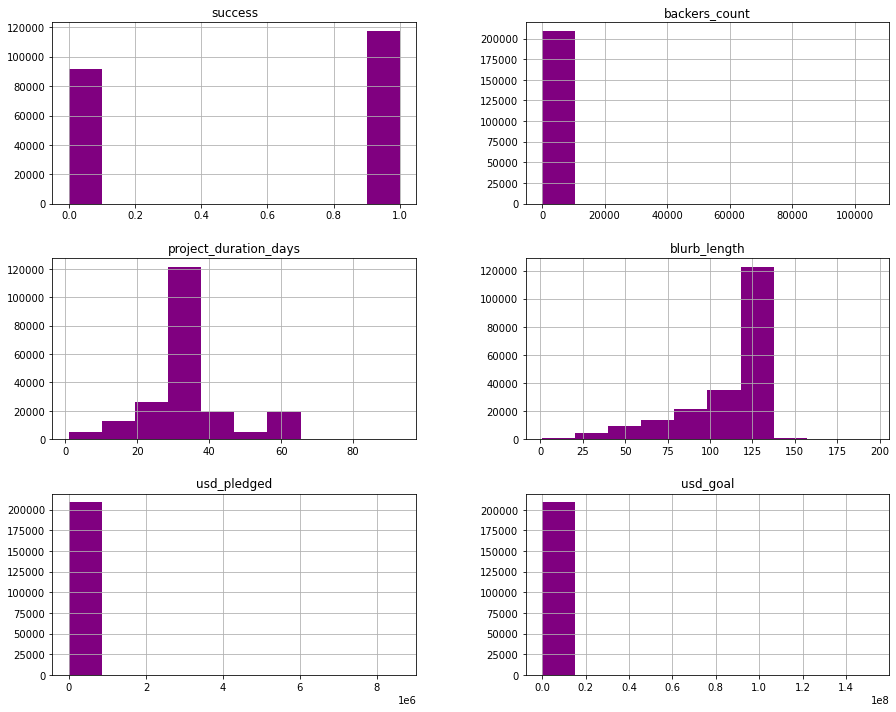

In [34]:
# Check out data distributions
df.hist(column =['success', 'backers_count','project_duration_days', 'blurb_length', 'usd_pledged',
       'usd_goal'], figsize=(15, 12), color='purple');

#backers_count and usd_goal have strong outliers
#blurb_length and project_duration_days are skewed
#successors and non-successors are imbalanced

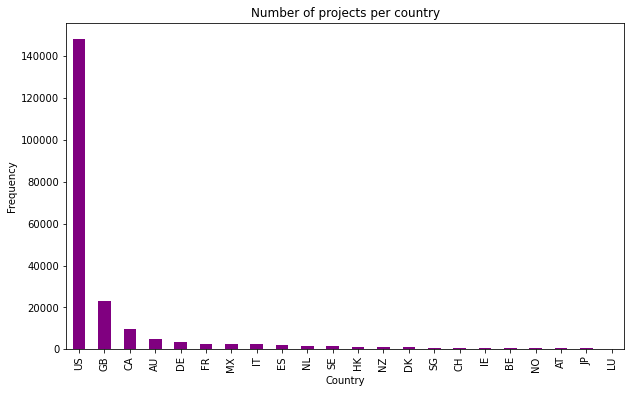

In [35]:
# Check out data distributions
ax = df['country_original'].value_counts().plot(kind='bar', figsize=(10,6), color='purple',
     title="Number of projects per country")
ax.set_xlabel("Country")
ax.set_ylabel("Frequency")
plt.show()

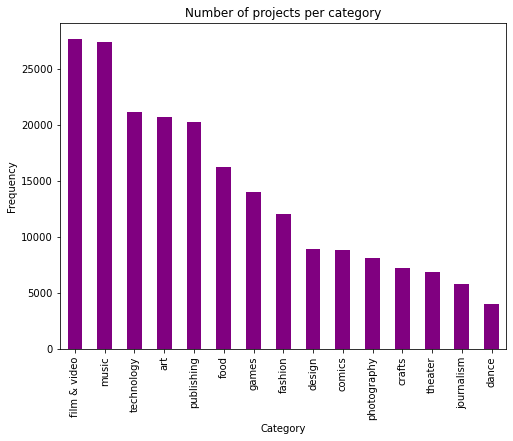

In [36]:
# Check out data distributions
ax = df['category_main_original'].value_counts().plot(kind='bar',
                                    figsize=(8,6),
                                    color='purple',
                                    title="Number of projects per category")
ax.set_xlabel("Category")
ax.set_ylabel("Frequency")
plt.show()

## Outlier detection and removal

### usd_goal

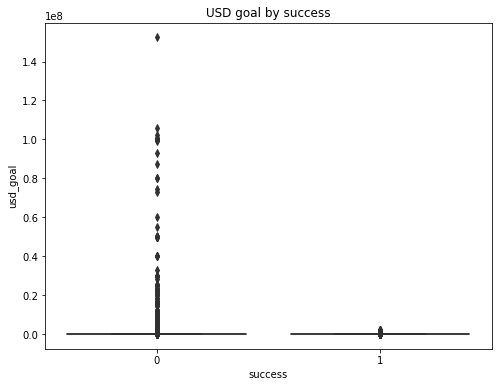

In [37]:
#Boxplot of USD goal by success
plt.figure(figsize=(8,6))
sns.boxplot(x='success', y='usd_goal', data=df, palette='rocket_r')
plt.title('USD goal by success');
#Extreme outliers - trim data

In [38]:
df.usd_goal.describe().round(0)

count       209222.0
mean         40973.0
std        1120040.0
min              0.0
25%           1500.0
50%           5000.0
75%          13000.0
max      152350076.0
Name: usd_goal, dtype: float64

In [39]:
#Check on distribution of usd_goal
df.quantile(q=[0.1,0.2,0.4,0.6,0.8,0.95, 0.98], axis=0, numeric_only=True, interpolation='linear')['usd_goal']   

0.10       500.000000
0.20      1000.000000
0.40      3000.000000
0.60      6982.625430
0.80     17292.262350
0.95     64485.599465
0.98    150000.000000
Name: usd_goal, dtype: float64

In [40]:
#Drop extreme outliers 
df = df[df.usd_goal < df.usd_goal.quantile(.98)]

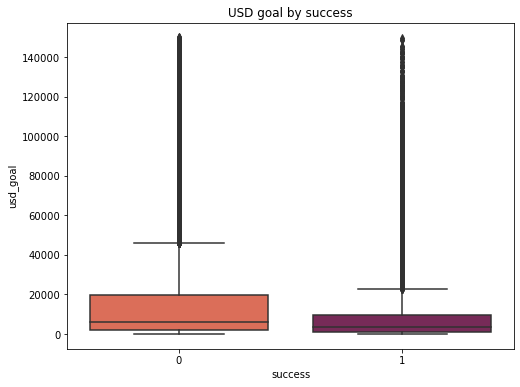

In [41]:
#Boxplot of USD goal by success
plt.figure(figsize=(8,6))
sns.boxplot(x='success', y='usd_goal', data=df, palette='rocket_r')
plt.title('USD goal by success');
#Extreme outliers - trim data

### backers_count

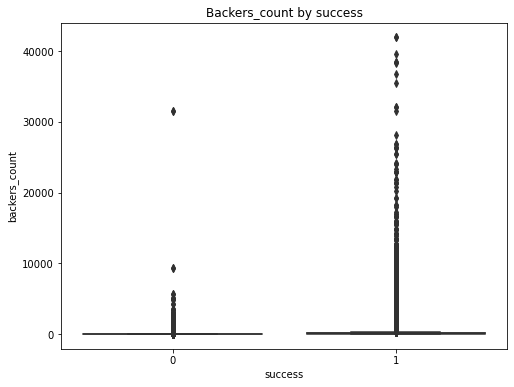

In [42]:
#Boxplot of backers_count by success
plt.figure(figsize=(8,6))
sns.boxplot(x='success', y='backers_count', data=df, palette='rocket_r')
plt.title('Backers_count by success');
#Extreme outliers - trim data

### project_duaration_days

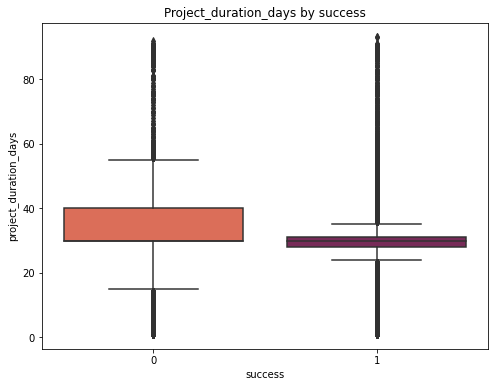

In [43]:
#Boxplot of project_duration_days by success
plt.figure(figsize=(8,6))
sns.boxplot(x='success', y='project_duration_days', data=df, palette='rocket_r')
plt.title('Project_duration_days by success');

### blurb_length

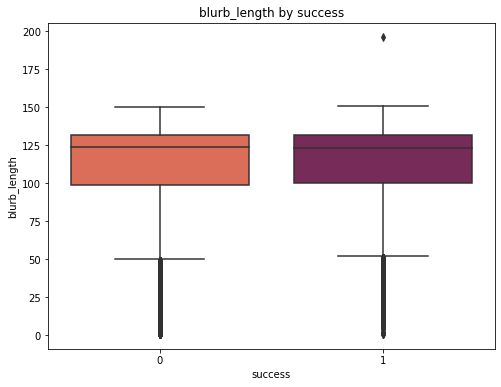

In [44]:
#Boxplot of blurb_length by success
plt.figure(figsize=(8,6))
sns.boxplot(x='success', y='blurb_length', data=df, palette='rocket_r')
plt.title('blurb_length by success');

# Descriptive statistics

### Success vs. failure

In [45]:
# Plot with percentage of successors vs. failures - pie chart
from matplotlib.ticker import PercentFormatter

#Kickstarter projects by ...
def percent_plot(df, title):
    '''
    INPUT: df- data of which to graph distribution
            title- graph title
    OUTPUT: Distribution of Data by Percentage Points
    '''
    ax = df.plot(kind='bar', color='purple')
    plt.title(title)
    ax.yaxis.set_major_formatter(PercentFormatter())
    plt.show();

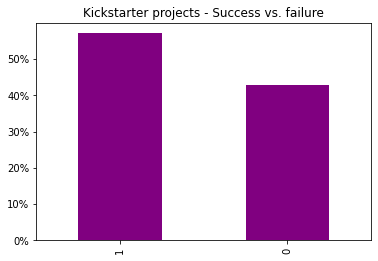

In [46]:
#Kickstarter Projects by success
percent_plot((df.success.value_counts()/df.shape[0]*100),
             "Kickstarter projects - Success vs. failure")

In [47]:
df.success.value_counts()/df.shape[0]*100

1    57.118324
0    42.881676
Name: success, dtype: float64

#### OUR ADVICE: Make your campaign a succes and come to the 57% of winners!

### Success factors (accodring to descriptive statistics) - How do winners and losers look like?

In [48]:
def corr_plot(features, fig_size, title):
    '''
    INPUT: features- which columns of df_encoded to calculate correlation
            fig_size- size of the correlation heatmap for ease of reading
    OUTPUT: Seaborn Heatmap of Correlations
    '''
    corr=df[features].corr()
    
    # Generate a mask to cover the upper triangle of the heatmap
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    fig, ax = plt.subplots(figsize=fig_size)
    plt.title(title)
    sns.heatmap(corr, mask=mask, square=True, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,
                ax=ax, linewidths=0.01, cmap="rocket_r");

In [49]:
def distplot_features(df, feature):
    '''
    INPUT: features- which columns of df_encoded to calculate correlation
    OUTPUT: Distplot of counts
    '''
    sns.displot(df, x=feature, hue="success", palette="rocket_r", bins=10);   

In [50]:
#Is there a best 'backers_count','project_duration_days', 'blurb_length','usd_goal'? 
df.groupby(['success'])['backers_count','project_duration_days', 'blurb_length','usd_goal', 'usd_pledged'].median()

<ipython-input-50-3bdba5b91f19>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['success'])['backers_count','project_duration_days', 'blurb_length','usd_goal', 'usd_pledged'].median()


,backers_count,project_duration_days,blurb_length,usd_goal,usd_pledged
success,,,,,
0,3,30,124,6000.0,67.000000
1,69,30,123,3500.0,4868.187536


In [51]:
#Is there a best 'backers_count','project_duration_days', 'blurb_length','usd_goal'? 
df.groupby(['success'])['backers_count','project_duration_days', 'blurb_length','usd_goal', 'usd_pledged'].mean()

<ipython-input-51-0a26c5ae1ad2>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['success'])['backers_count','project_duration_days', 'blurb_length','usd_goal', 'usd_pledged'].mean()


,backers_count,project_duration_days,blurb_length,usd_goal,usd_pledged
success,,,,,
0,19.655976,34.537937,111.185687,15749.561785,1603.007189
1,220.587200,30.698982,112.086832,8121.123562,19255.706945


In [54]:
df.groupby(['success'])['category_main_original','country_original'].value_counts()

<ipython-input-54-19c9e109bb86>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['success'])['category_main_original','country_original'].value_counts()


AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

In [55]:
#Percentage of the goal that was met by the amount pledged.
df['percent_goal_met']=df['usd_pledged']/df['usd_goal'] * 100

In [56]:
df.groupby(['success'])['percent_goal_met'].median()

success
0      1.333333
1    118.454545
Name: percent_goal_met, dtype: float64

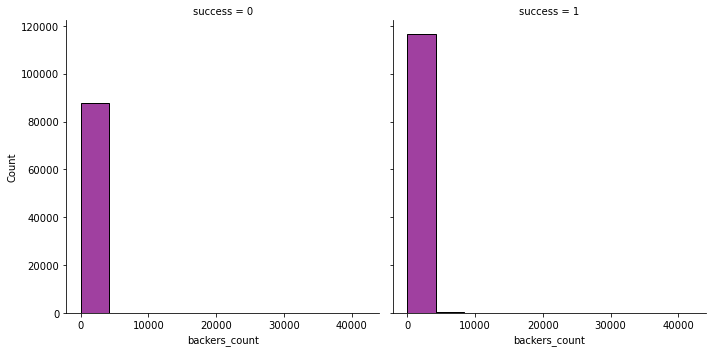

In [57]:
sns.displot(df, x="backers_count", col="success", multiple="dodge", color="purple", bins=10);

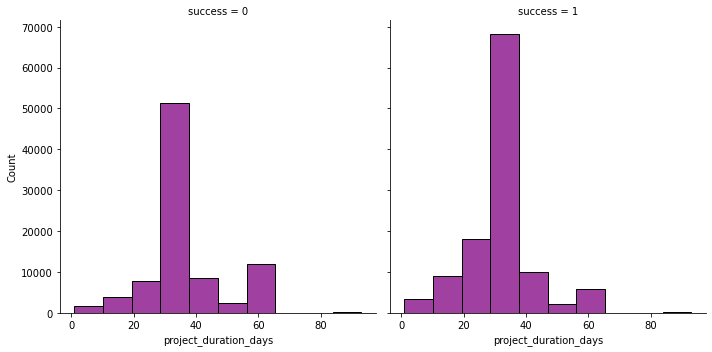

In [58]:
sns.displot(df, x="project_duration_days", col="success", multiple="dodge", color="purple", bins=10);

In [ ]:
distplot_features(df, 'project_duration_days');

In [ ]:
distplot_features(df,'blurb_length');

In [ ]:
distplot_features(df,'usd_goal');

In [59]:
from numpy import median

#ax = sns.pointplot(x="success", y="usd_goal", data=df, estimator=median)

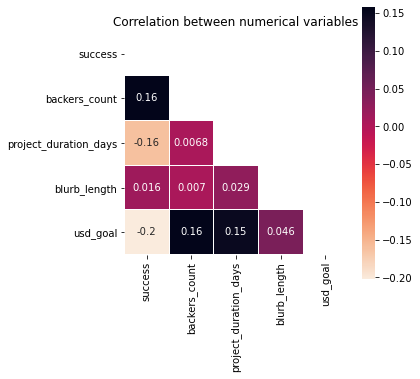

In [60]:
#correlation between success, backers_count, project_duration_day, blurb_length and usd_goal
corr_plot(['success', 'backers_count','project_duration_days', 'blurb_length','usd_goal'], 
          (5,5), ('Correlation between numerical variables'))

#### OUR ADVICE: 
* #### Get as many backers as possible (Advertise your compaign on social media)! 
* #### Don't ask too much money and set your USD goal realistically. 
* #### Make a detailed (and precise) description of your project. 
* #### Set sufficient time (project duration) to reach your USD goal. 

In [61]:
#Is there a best project category?
df.groupby(['success']).category_main_original.value_counts()

success  category_main_original
0        technology                11967
         film & video              10985
         food                      10115
         music                      9369
         art                        8871
         publishing                 6540
         games                      5494
         fashion                    5022
         photography                4034
         journalism                 3899
         crafts                     3742
         design                     3255
         theater                    1959
         comics                     1907
         dance                       736
1        music                     17857
         film & video              15636
         publishing                13630
         art                       11571
         games                      8175
         technology                 8000
         fashion                    6959
         comics                     6886
         food            

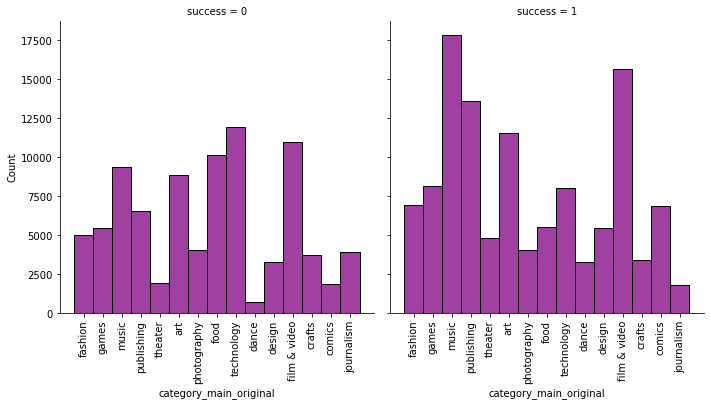

In [62]:
sns.displot(df, x="category_main_original", col="success", 
            multiple="dodge", color="purple").set_xticklabels(rotation=90);

In [ ]:
#correlation between project category and success
corr_plot(['success','category_main_original', 'country_original', 'category_main_comics',
       'category_main_crafts', 'category_main_dance', 'category_main_design',
       'category_main_fashion', 'category_main_film & video',
       'category_main_food', 'category_main_games', 'category_main_journalism',
       'category_main_music', 'category_main_photography',
       'category_main_publishing', 'category_main_technology',
       'category_main_theater'], (12,12), ('Correlation between project category and success'))

#### OUR ADVICE: There is no 'one best project category'. Take courage - Any project category can be successful! 

In [63]:
#Is there a best country to host the project? 
df.groupby(['success']).country_original.value_counts()

success  country_original
0        US                  60314
         GB                   8910
         CA                   4499
         AU                   2418
         DE                   1831
         IT                   1499
         MX                   1314
         FR                   1232
         ES                   1089
         NL                   1004
         SE                    673
         NZ                    434
         DK                    403
         CH                    340
         IE                    325
         HK                    318
         BE                    315
         AT                    280
         SG                    272
         NO                    262
         JP                    145
         LU                     18
1        US                  85144
         GB                  13856
         CA                   5168
         AU                   2319
         DE                   1498
         FR                  

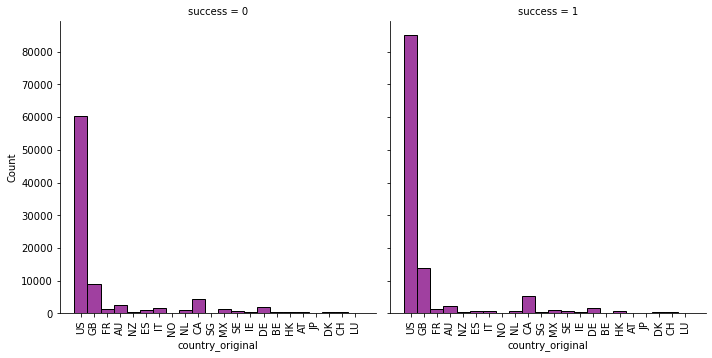

In [64]:
sns.displot(df, x="country_original", col="success", 
            multiple="dodge", color="purple").set_xticklabels(rotation=90);

In [93]:
country_list_success = df.query('success==1').country_original.value_counts()/df.country_original.value_counts()*100

In [94]:
country_list_success

AT    41.544885
AU    48.955035
BE    41.666667
CA    53.460226
CH    46.202532
DE    44.998498
DK    55.665567
ES    42.894599
FR    52.211016
GB    60.862690
HK    70.335821
IE    48.248408
IT    32.930649
JP    62.532300
LU    66.037736
MX    43.918054
NL    42.726754
NO    46.963563
NZ    52.877307
SE    51.756272
SG    60.465116
US    58.535110
Name: country_original, dtype: float64

In [95]:
df_country_list_success = pd.DataFrame({'country':country_list_success.index, 'percent_success':country_list_success.values})

In [96]:
df_country_list_success.head()

,country,percent_success
0,AT,41.544885
1,AU,48.955035
2,BE,41.666667
3,CA,53.460226
4,CH,46.202532


In [97]:
df_country_list_success.sort_values(['percent_success'], ascending=False, inplace=True)

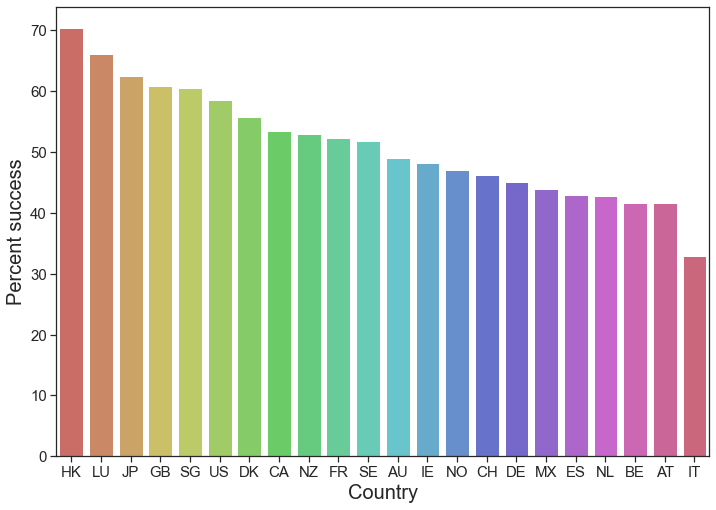

In [157]:
sns.set_style('ticks')
fig, ax = plt.subplots()

ax = sns.barplot(x="country", y="percent_success", data=df_country_list_success, palette="hls", ax=ax)
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
ax.set_ylabel("Percent success",fontsize=20)
ax.set_xlabel("Country",fontsize=20)
ax.tick_params(labelsize=15);

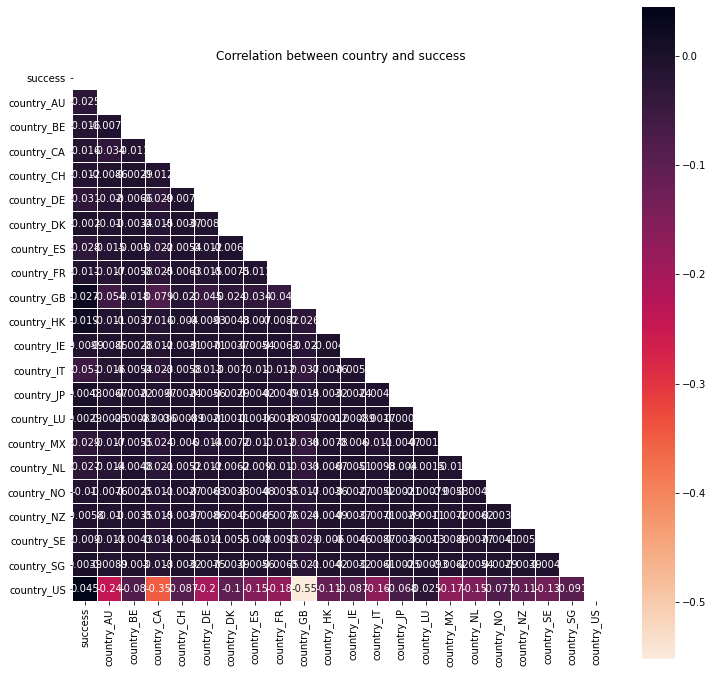

In [62]:
#correlation between country and success
corr_plot(['success', 'country_AU', 'country_BE', 'country_CA',
       'country_CH', 'country_DE', 'country_DK', 'country_ES', 'country_FR',
       'country_GB', 'country_HK', 'country_IE', 'country_IT', 'country_JP',
       'country_LU', 'country_MX', 'country_NL', 'country_NO', 'country_NZ',
       'country_SE', 'country_SG', 'country_US'], (12,12), ('Correlation between country and success'))

#### OUR ADVICE: There is no 'best country' to host your campaign. Your project can be successful in any country!  

#### OUR ADVICE: Anything up to here was general advice! If you want a prognosis for your specific project - hand your idea to us and we run our models to check your chances of success. 

## Transformation of distributions for modelling

In [63]:
# Log-transform the skewed features
skewed = ['usd_goal', 'backers_count', 'project_duration_days', 'blurb_length']
df[skewed] = df[skewed].apply(lambda x: np.log(x + 1))

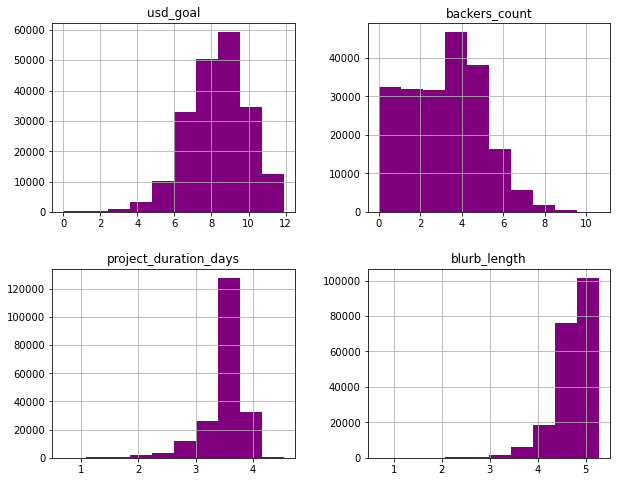

In [64]:
df.hist(column =['usd_goal', 'backers_count', 'project_duration_days', 'blurb_length'], figsize=(10, 8), color='purple');
#Distributions look better now

## Data scaling

In [65]:
#Scaling to have all feature values between 0 and 1. 
def scale_features(data, num_columns=['usd_goal', 'backers_count', 'project_duration_days', 'blurb_length']):
    ''' Initialize a scaler, then apply it to the features'''
    scaler = MinMaxScaler()
    data[num_columns] = scaler.fit_transform(data[num_columns])
    return data

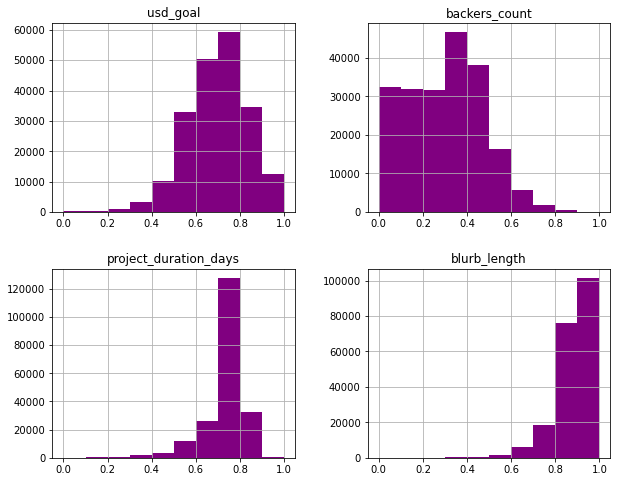

In [66]:
df = scale_features(df)
# Check out data distributions
df.hist(column =['usd_goal', 'backers_count', 'project_duration_days', 'blurb_length'], figsize=(10, 8), color='purple');

# Results

In [67]:
# Success factors! - Results of the models! Feature importance! 